In [2]:
import cifar10
import matplotlib.pyplot as plt

In [3]:
cifar10.data_path = "data/CIFAR-10/"

In [ ]:
# cifar10.maybe_download_and_extract()

In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [30]:
print("Size of:")
print("Training-set:\t\t{}".format(len(images_train)))
print("Test-set:\t\t{}".format(len(images_test)))

Size of:
Training-set:		50000
Test-set:		10000


In [31]:
cls_test

array([3, 8, 8, ..., 5, 1, 7])

In [32]:
pixels_train = images_train.reshape(50000,3072)
pixels_test  = images_test.reshape(10000, 3072)

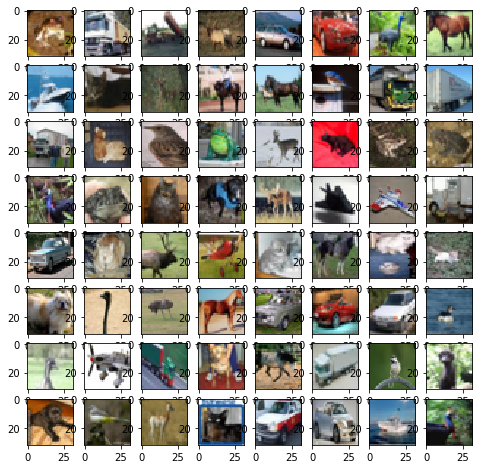

In [15]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i])
plt.show()

In [28]:
import numpy as np

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [21]:
clf = RandomForestClassifier(n_jobs=5,n_estimators=100)

In [33]:
# x_train, x_test, y_train, y_test = train_test_split(pixels, cls_train, test_size=0.25, random_state = 0)
x_train, x_test, y_train, y_test = pixels_train, pixels_test, cls_train, cls_test

In [34]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
clf.score(x_test, y_test)

0.4672

In [36]:
y_pred = clf.predict(x_test)

In [37]:
y_pred

array([6, 8, 8, ..., 3, 5, 7])

In [40]:
np.savetxt('output.csv', y_pred)